In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
from functions.parse_data import synth_dataloader

/tmp/ipykernel_304290/4283809462.py:4: DeprecationWarning: Please import `pearsonr` from the `scipy.stats` namespace; the `scipy.stats.stats` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.stats.stats import pearsonr


In [2]:
#Read data and name columns
df = synth_dataloader(drop_cols=False)
print(df.shape)
df.head(10)



(200000, 35)


,Cloud_B01,Cloud_B02,Cloud_B03,Cloud_B04,Cloud_B05,Cloud_B06,Cloud_B07,Cloud_B08,Cloud_B08A,Cloud_B09,Cloud_B10,Cloud_B11,Cloud_B12,Clear_B01,Clear_B02,Clear_B03,Clear_B04,Clear_B05,Clear_B06,Clear_B07,Clear_B08,Clear_B08A,Clear_B09,Clear_B10,Clear_B11,Clear_B12,Sat_Zenith_Angle,Sun_Zenith_Angle,Azimuth_Diff_Angle,COT,Cloud_Type,Profile_ID,GOT,Water_Vapor,Surface_Desc
0,0.95937,0.94195,0.87799,0.92936,0.93407,0.95181,0.96217,0.92871,0.97181,0.49957,0.04136,0.35377,0.36916,0.98933,0.97351,0.90925,0.95929,0.96942,0.98395,0.99147,0.96847,0.99868,0.56229,0.00659,0.12946,0.18888,4.53,52.05,167.66,5.897,3,3335,0.126,0.35,water-snow-mediumgranular
1,0.28649,0.30422,0.40100,0.27834,0.57800,1.01964,1.02787,1.00519,1.03599,0.59139,0.01055,0.70143,0.34977,0.27216,0.29556,0.40223,0.27128,0.58144,0.98865,0.99464,0.97473,1.00019,0.60785,0.01233,0.71532,0.36823,12.85,41.68,161.91,1.275,2,1996,0.126,0.31,vegetation-tree-pinus
2,0.30657,0.28715,0.25066,0.30366,0.29214,0.34088,0.40079,0.37376,0.48750,0.02092,0.00067,0.58199,0.42420,0.25044,0.24502,0.23997,0.34232,0.33544,0.41559,0.51648,0.48585,0.66605,0.01564,0.00067,0.86232,0.63915,14.53,79.23,168.52,1.799,1,6796,0.127,4.04,soil-mollisol-haplaquoll
3,0.27930,0.27146,0.33719,0.19841,0.46411,0.88787,0.89584,0.87746,0.90439,0.51811,0.00561,0.49281,0.20686,0.27146,0.27220,0.35902,0.20701,0.51116,0.96866,0.97917,0.96099,0.99096,0.57217,0.00639,0.56307,0.23663,6.54,70.23,165.49,0.519,2,3701,0.123,0.22,vegetation-tree-abies
4,0.42411,0.39689,0.38594,0.32623,0.37338,0.60678,0.66895,0.55343,0.70168,0.01513,0.00049,0.36782,0.18918,0.24891,0.25343,0.37614,0.19439,0.43390,0.82220,0.91428,0.75993,0.97020,0.01697,0.00049,0.56472,0.20853,8.56,75.15,148.48,8.569,2,6345,0.128,5.40,vegetation-shrub-baccharis
5,0.79443,0.75592,0.65853,0.70670,0.71369,0.73147,0.74182,0.71190,0.75003,0.32287,0.00328,0.54885,0.41521,0.89159,0.88627,0.80818,0.90224,0.91804,0.94812,0.96728,0.93087,0.98629,0.37218,0.00089,0.92187,0.87515,12.38,73.72,153.05,16.874,3,1419,0.126,0.51,rock-metamorphic-marble
6,0.38577,0.34660,0.30719,0.27459,0.35268,0.72965,0.74705,0.69842,0.75893,0.18345,0.00089,0.48257,0.29754,0.29985,0.26953,0.26552,0.19744,0.36634,0.93873,0.96587,0.90804,0.98853,0.23965,0.00089,0.64499,0.27212,14.74,73.05,13.63,3.589,3,424,0.122,0.99,vegetation-tree-eucalyptus
7,0.22584,0.22494,0.33843,0.19615,0.53821,0.98347,0.99256,0.96757,1.00132,0.53669,0.00511,0.59233,0.27126,0.21484,0.21831,0.34321,0.19432,0.55061,0.98291,0.99079,0.96773,0.99820,0.56044,0.00556,0.61388,0.28605,8.24,53.20,146.76,0.624,2,3427,0.125,0.35,vegetation-tree-pinus
8,0.57314,0.57982,0.62369,0.57909,0.75147,0.99608,1.04055,0.94017,1.07212,0.43014,0.03328,0.76279,0.47766,0.23580,0.26709,0.44208,0.22861,0.65997,0.95848,0.98256,0.92116,0.99847,0.26572,0.00031,0.94942,0.49475,11.57,38.00,117.48,13.909,1,6884,0.122,1.88,vegetation-shrub-calocedrus
9,0.82388,0.83664,0.80620,0.81432,0.78581,0.81063,0.84108,0.78542,0.85153,0.26374,0.00122,0.71246,0.52686,0.60122,0.65849,0.66191,0.62067,0.58880,0.60920,0.64748,0.60731,0.64360,0.17114,0.00037,0.90206,0.89850,9.69,45.83,23.04,24.937,3,7455,0.106,1.77,rock-igneous-intermediate


In [5]:
cloudcols = ['Clear_B01','Clear_B02','Clear_B03','Clear_B04','Clear_B05','Clear_B06',
             'Clear_B07','Clear_B08','Clear_B08A','Clear_B09','Clear_B10','Clear_B11','Clear_B12']
clearcols = ['Cloud_B02','Cloud_B03','Cloud_B04','Cloud_B05','Cloud_B06',
             'Cloud_B07','Cloud_B08','Cloud_B08A','Cloud_B09','Cloud_B10','Cloud_B11','Cloud_B12']

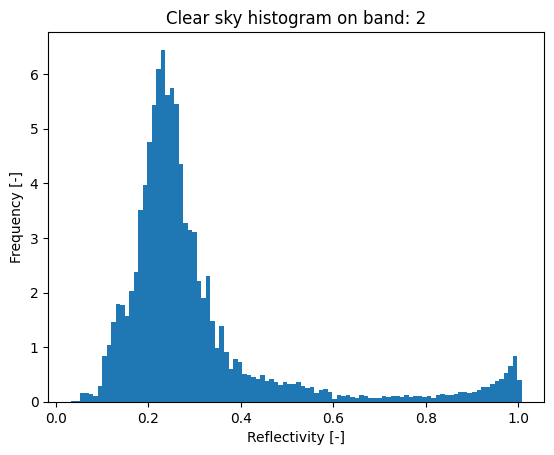

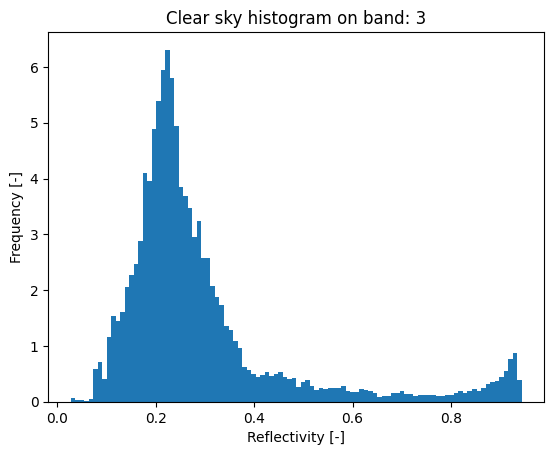

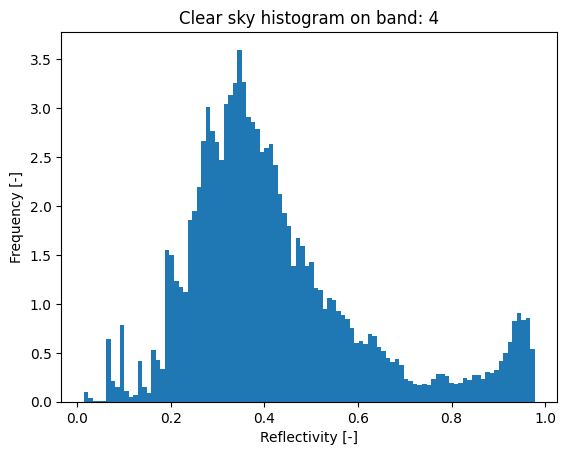

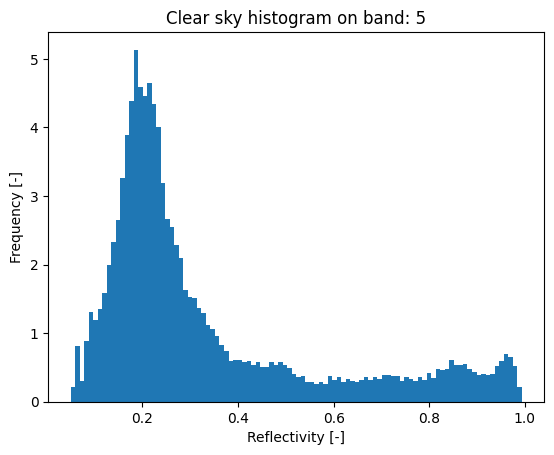

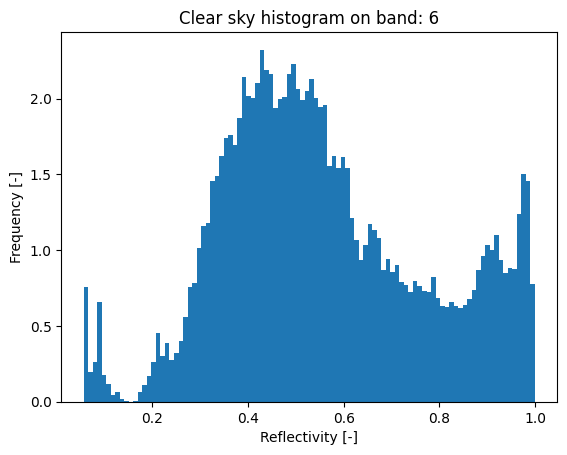

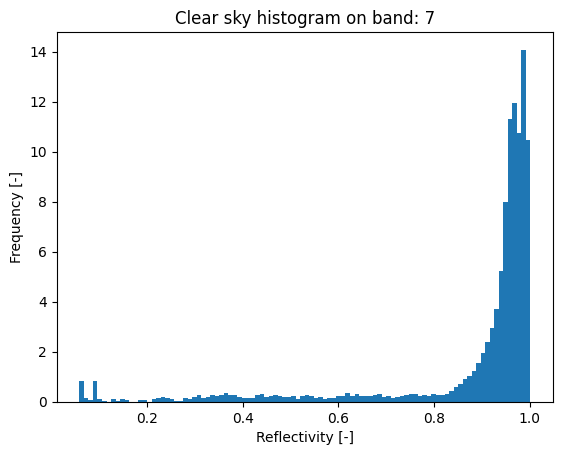

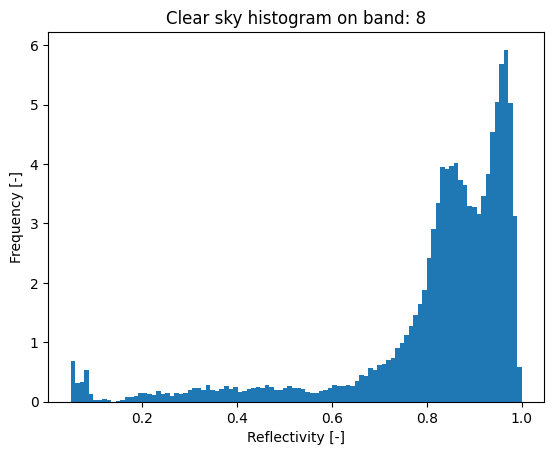

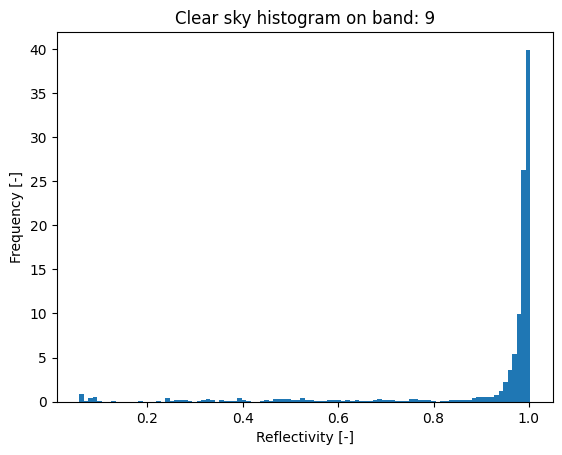

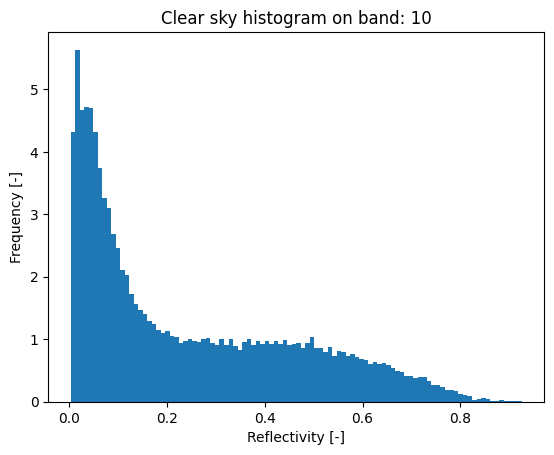

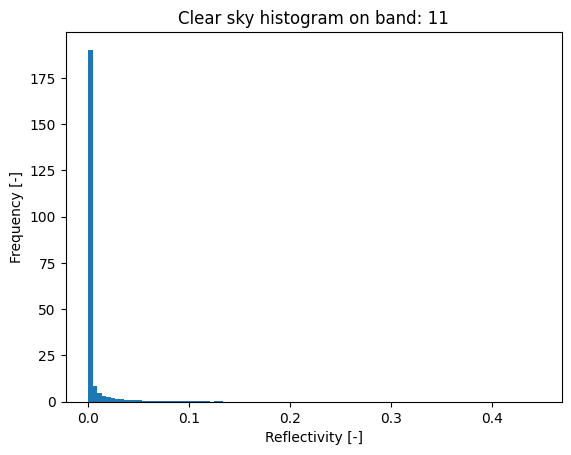

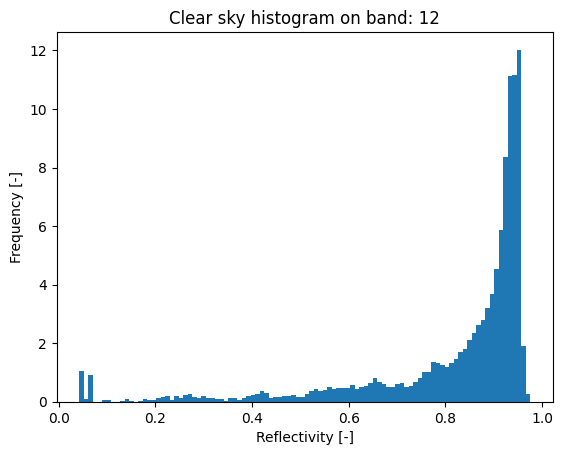

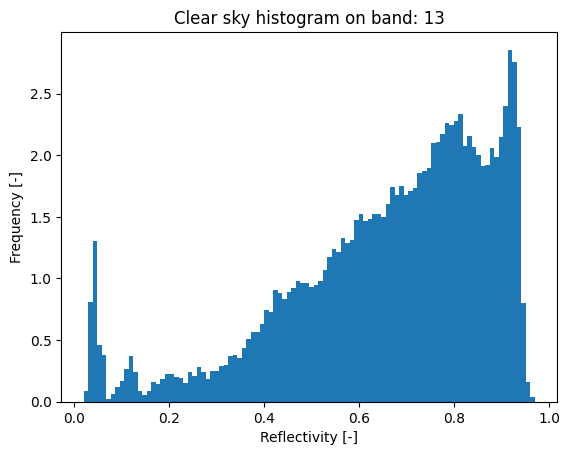

In [73]:
#Plot histograms of clear sky columns

clearall = np.array(df[clearcols])

for band in range(12):
    
    plt.figure()
    plt.hist(clearall[:,band],bins=100,density=True)
    plt.title('Clear sky histogram on band: ' + str(band+2))
    plt.xlabel('Reflectivity [-]')
    plt.ylabel('Frequency [-]')

plt.show()

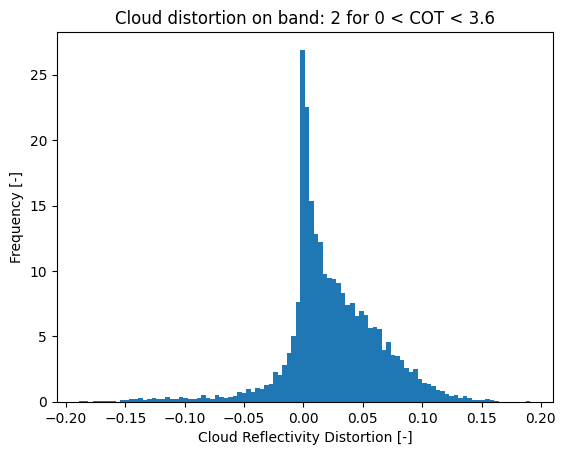

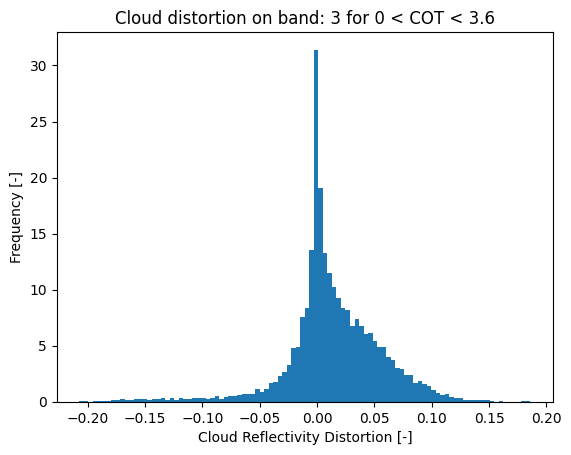

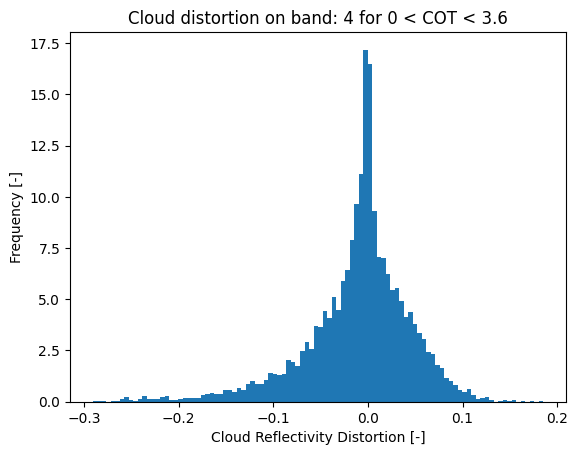

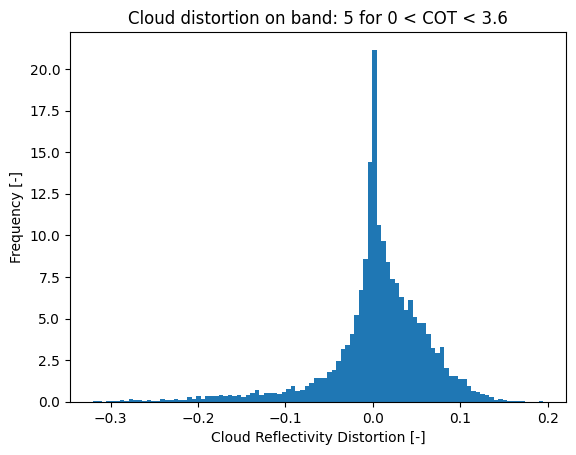

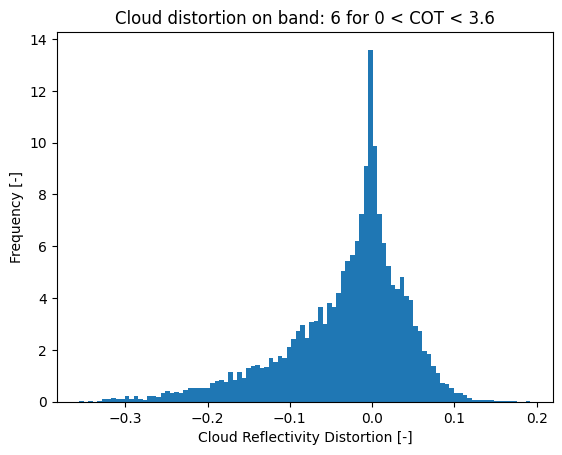

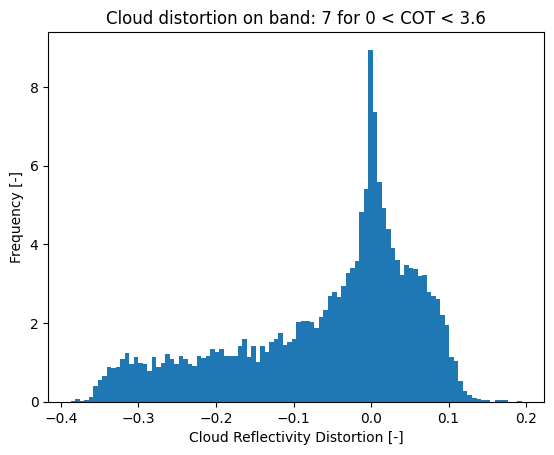

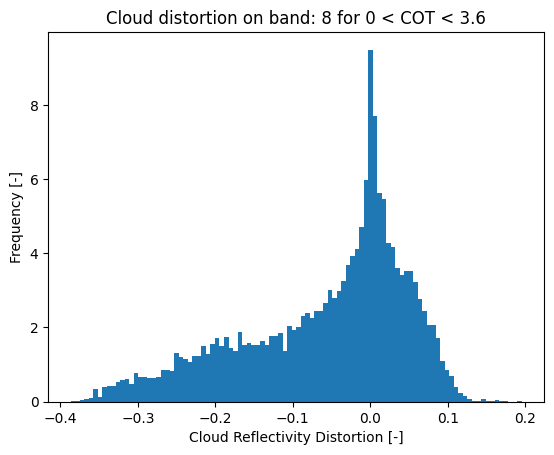

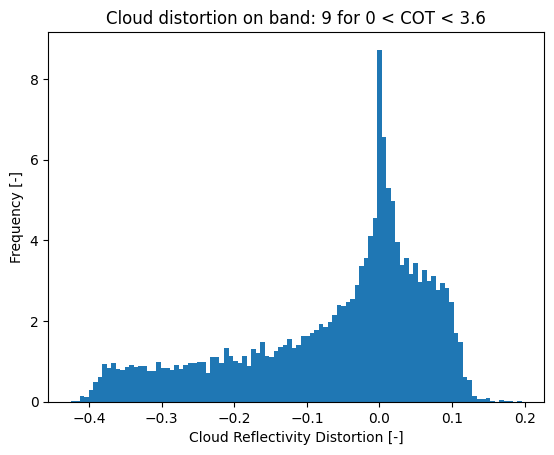

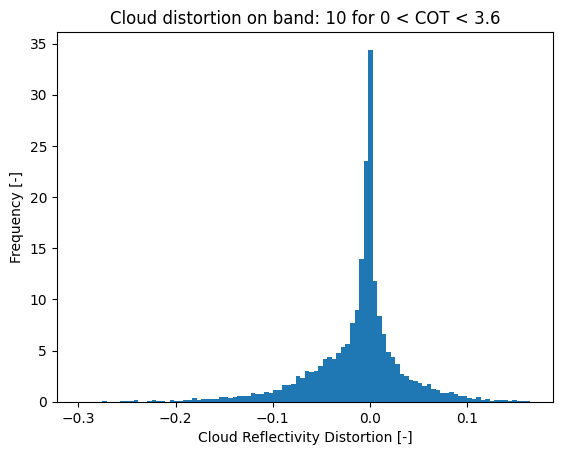

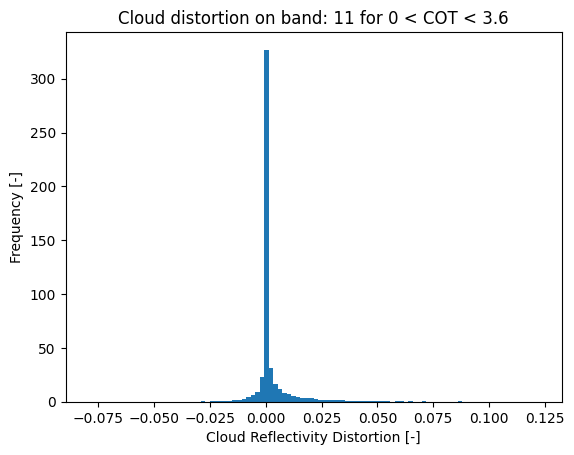

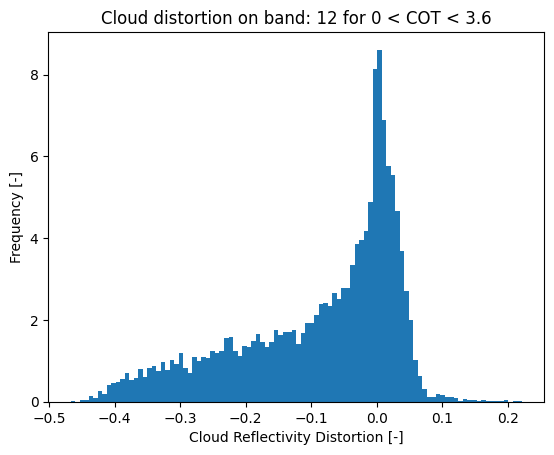

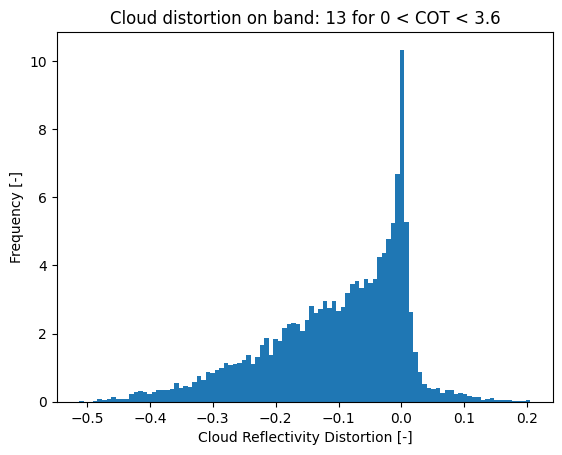

In [74]:
#Plot thin cloud contribution histograms 0 < COT < 3.6
COT1 = df[(df['COT'] > 0) & (df['COT'] < 3.6)]

cloud1 = np.array(COT1[cloudcols])
clear1 = np.array(COT1[clearcols])
COT1diff = cloud1-clear1
for band in range(12):
    
    plt.figure()
    plt.hist(COT1diff[:,band],bins=100,density=True)
    plt.title('Cloud distortion on band: ' + str(band+2) + ' for 0 < COT < 3.6')
    plt.xlabel('Cloud Reflectivity Distortion [-]')
    plt.ylabel('Frequency [-]')

plt.show()

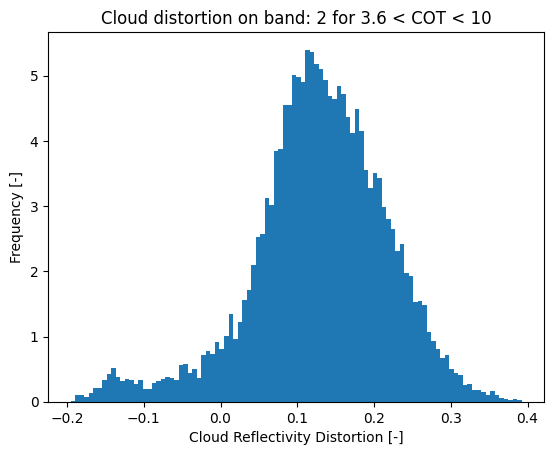

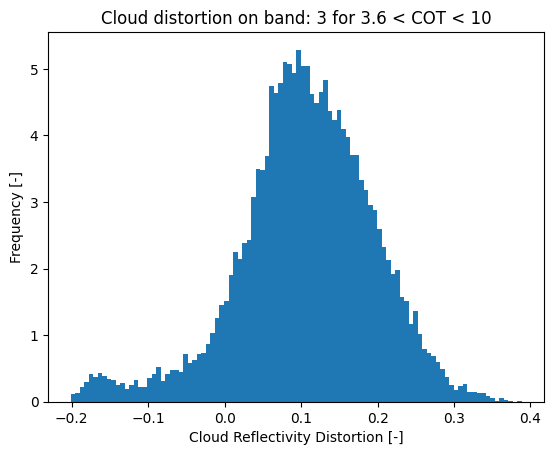

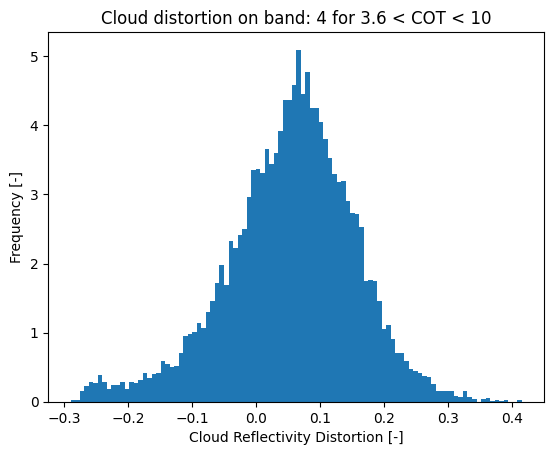

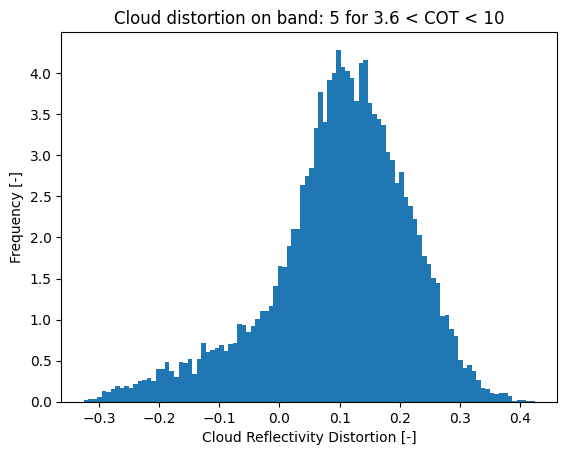

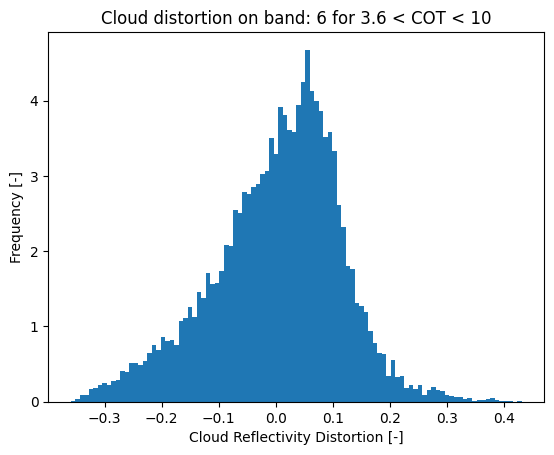

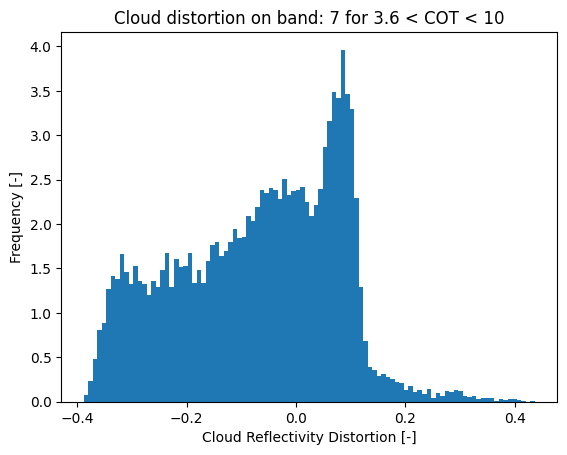

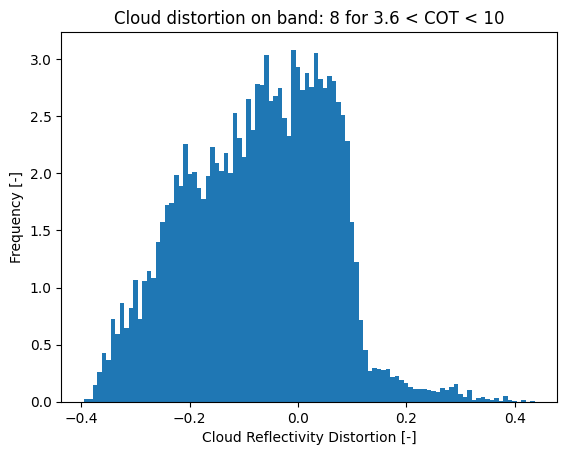

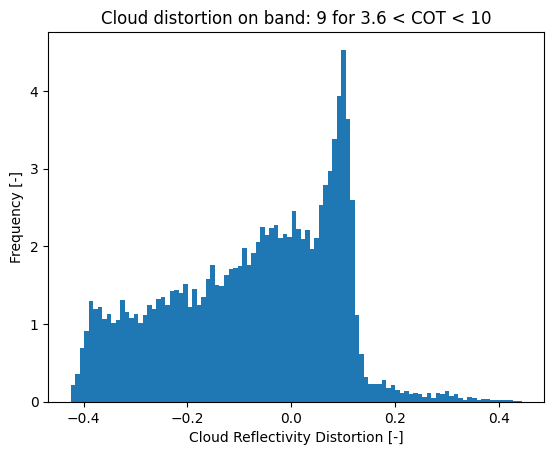

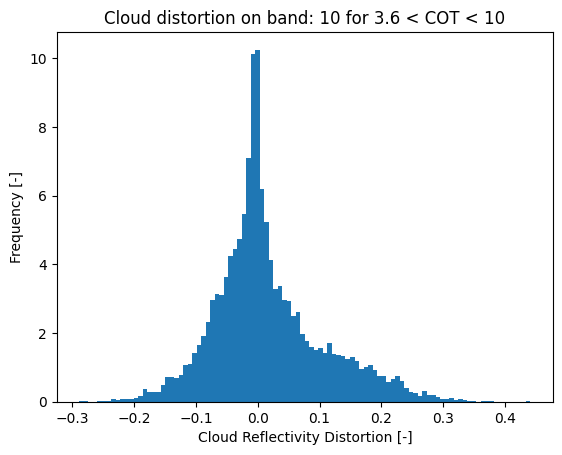

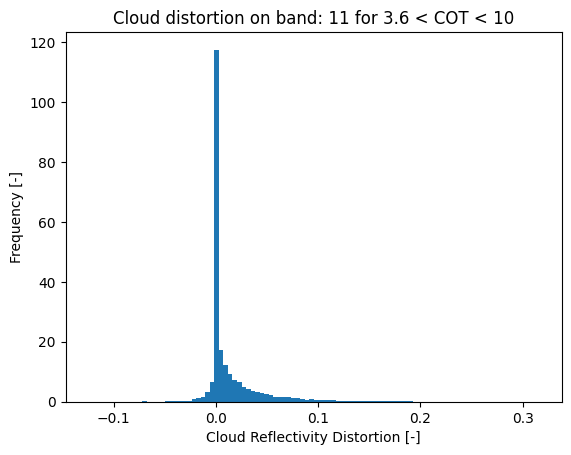

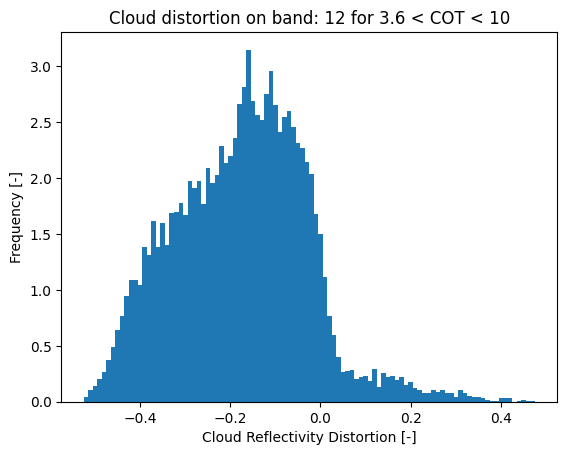

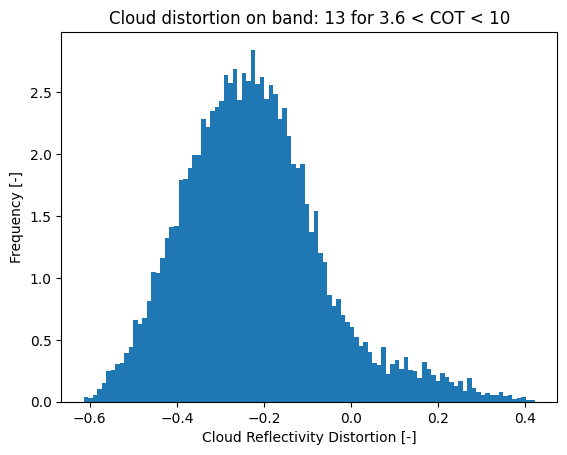

In [75]:
#Plot thin cloud contribution histograms 3.6 < COT < 10
COT2 = df[(df['COT'] > 3.6) & (df['COT'] < 10)]

cloud2 = np.array(COT2[cloudcols])
clear2 = np.array(COT2[clearcols])
COT2diff = cloud2-clear2
for band in range(12):
    
    plt.figure()
    plt.hist(COT2diff[:,band],bins=100,density=True)
    plt.title('Cloud distortion on band: ' + str(band+2) + ' for 3.6 < COT < 10')
    plt.xlabel('Cloud Reflectivity Distortion [-]')
    plt.ylabel('Frequency [-]')

plt.show()

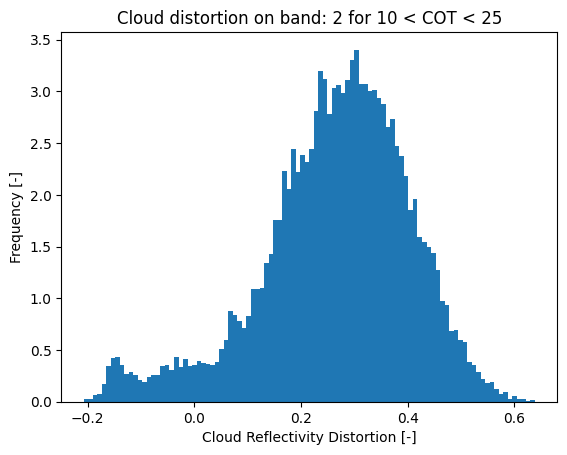

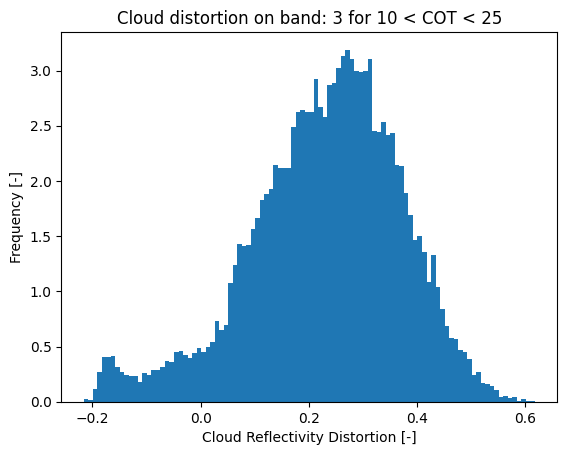

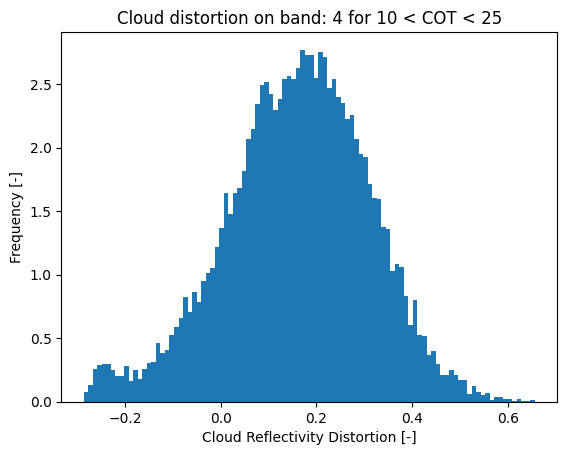

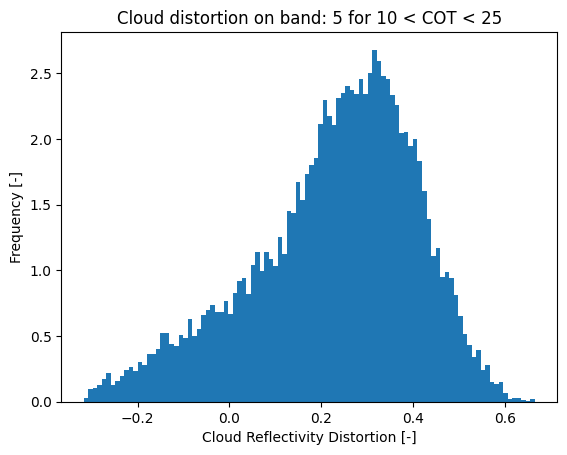

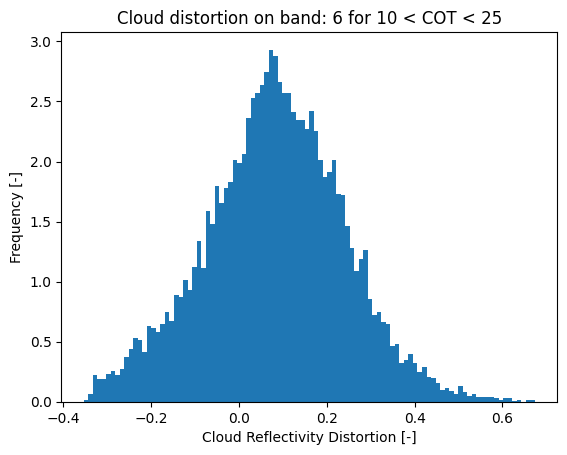

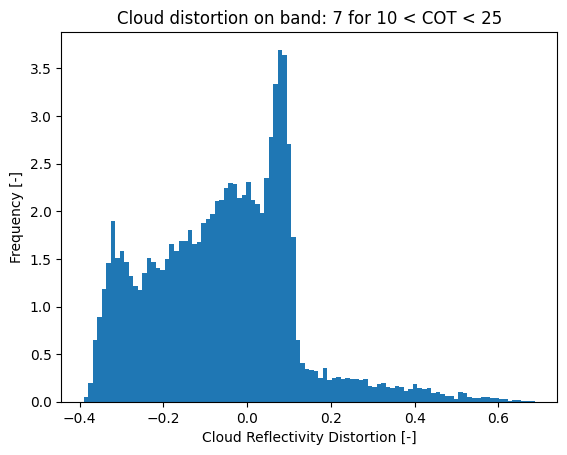

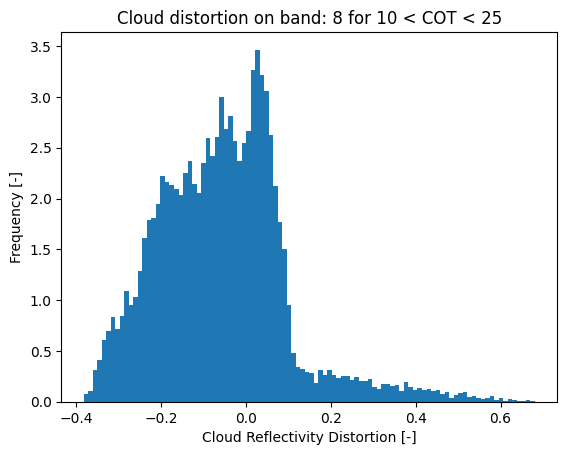

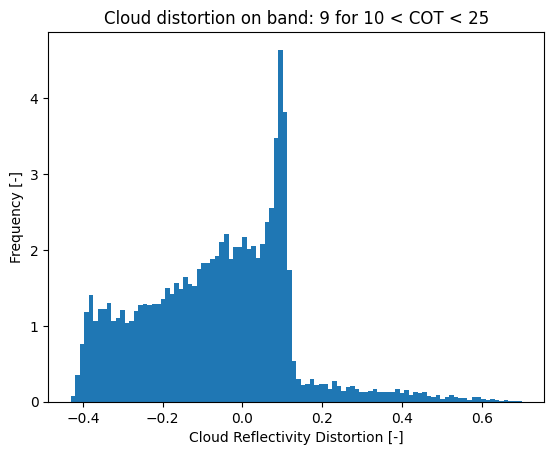

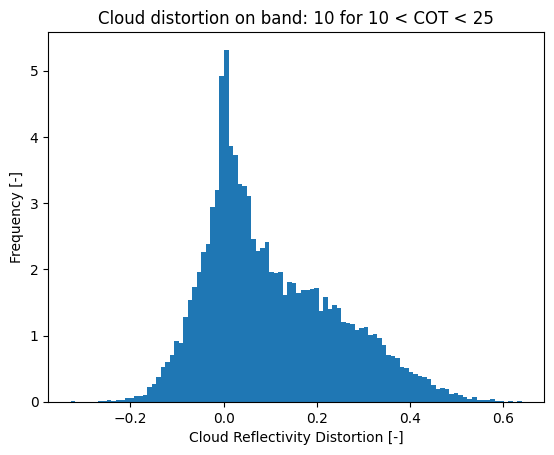

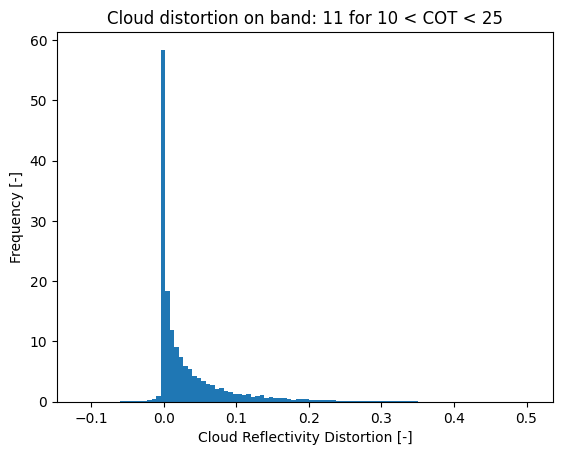

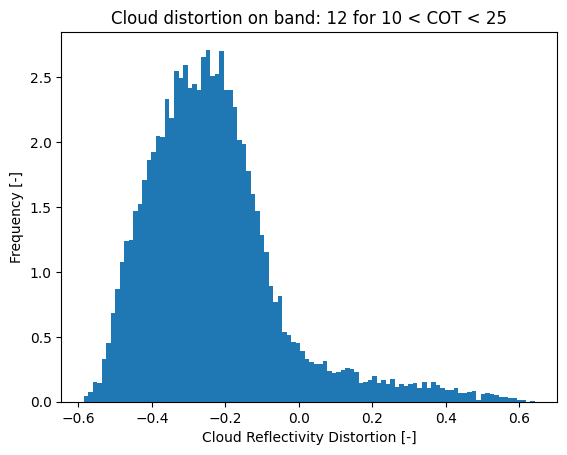

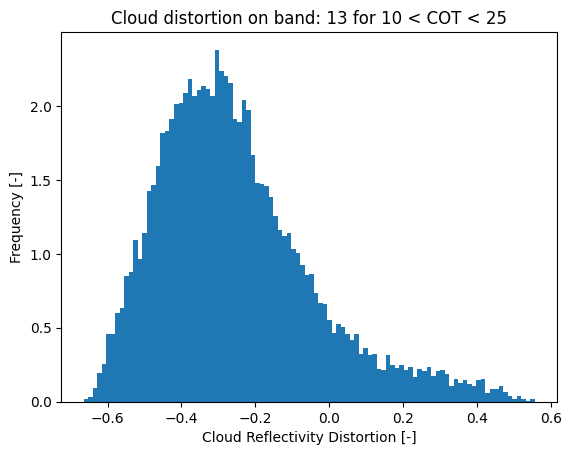

In [76]:
#Plot thin cloud contribution histograms 10 < COT < 25
COT3 = df[(df['COT'] > 10) & (df['COT'] < 25)]

cloud3 = np.array(COT3[cloudcols])
clear3 = np.array(COT3[clearcols])
COT3diff = cloud3-clear3
for band in range(12):
    
    plt.figure()
    plt.hist(COT3diff[:,band],bins=100,density=True)
    plt.title('Cloud distortion on band: ' + str(band+2) + ' for 10 < COT < 25')
    plt.xlabel('Cloud Reflectivity Distortion [-]')
    plt.ylabel('Frequency [-]')

plt.show()

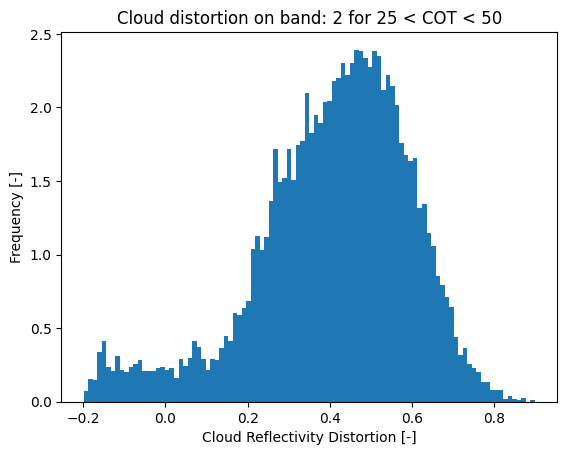

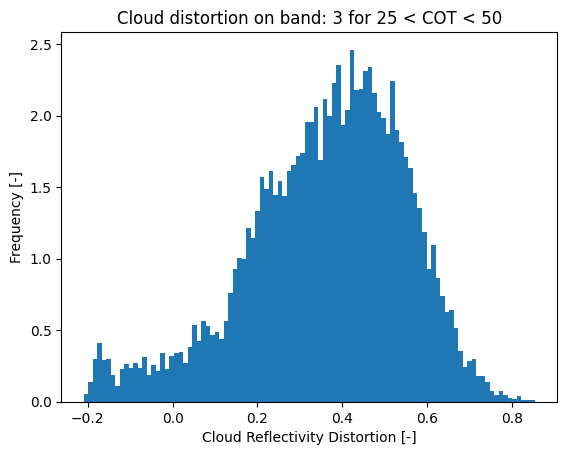

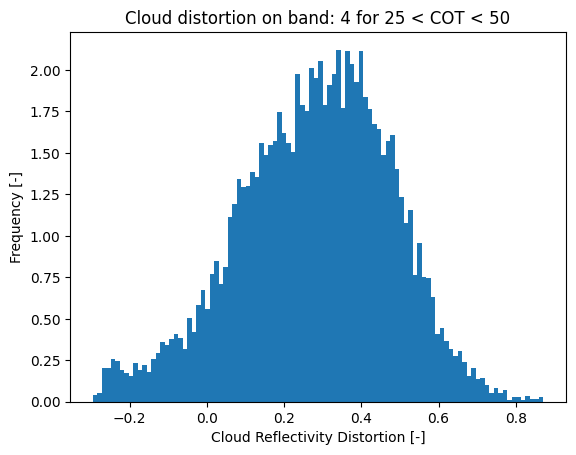

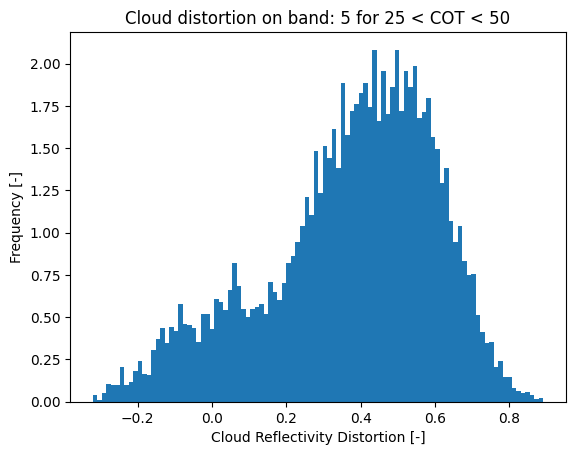

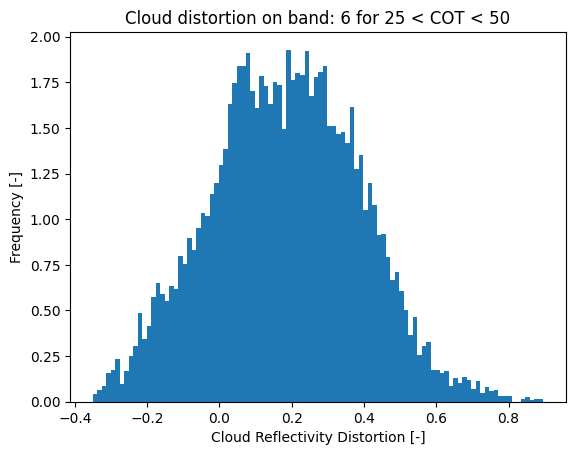

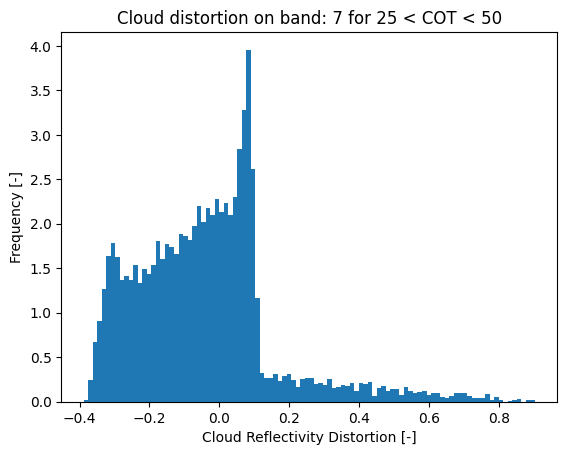

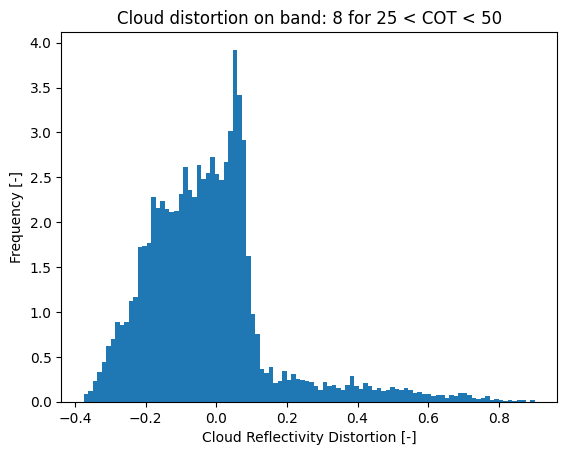

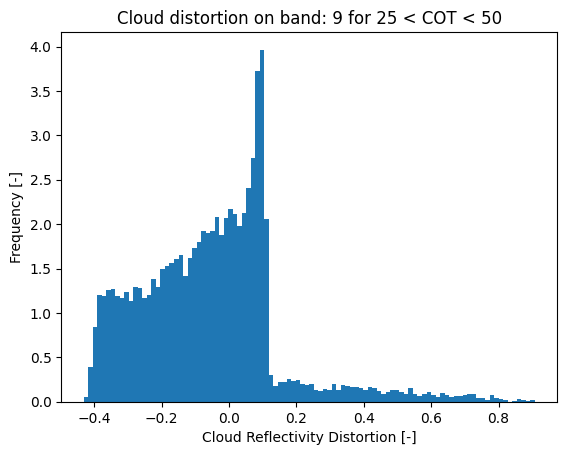

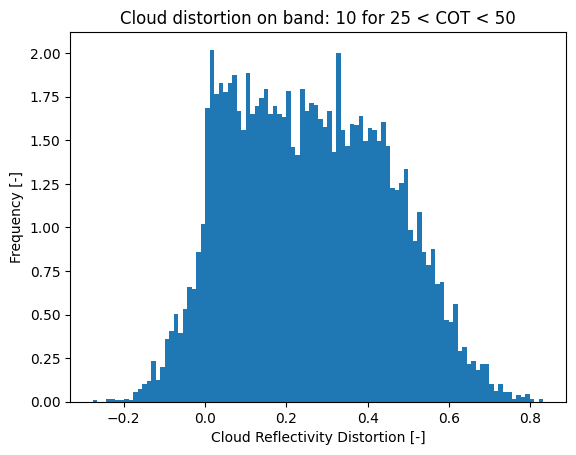

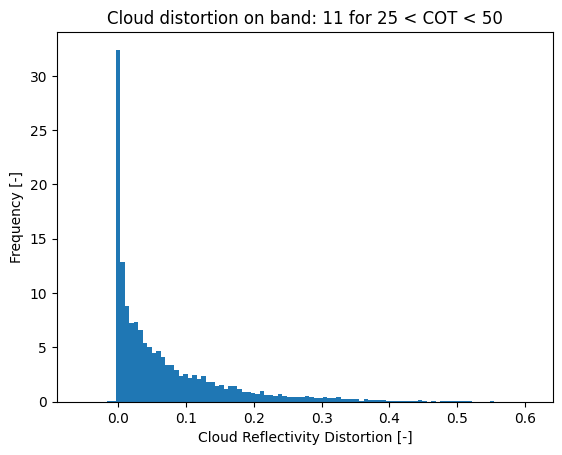

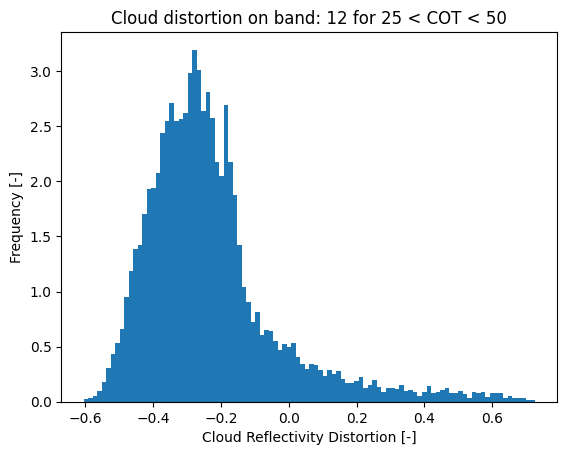

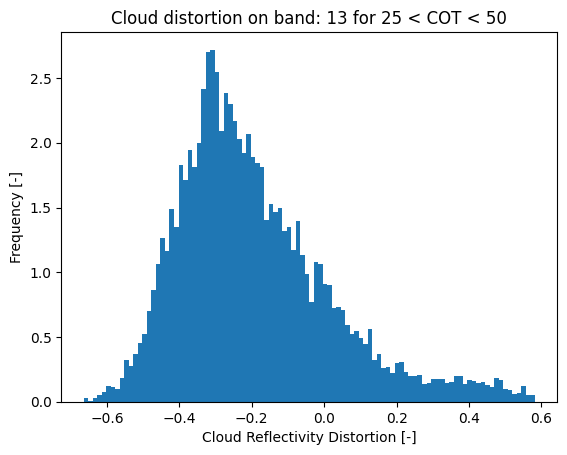

In [77]:
#Plot thin cloud contribution histograms 25 < COT < 50
COT4 = df[(df['COT'] > 25) & (df['COT'] < 50)]

cloud4 = np.array(COT4[cloudcols])
clear4 = np.array(COT4[clearcols])
COT4diff = cloud4-clear4
for band in range(12):
    
    plt.figure()
    plt.hist(COT4diff[:,band],bins=100,density=True)
    plt.title('Cloud distortion on band: ' + str(band+2) + ' for 25 < COT < 50')
    plt.xlabel('Cloud Reflectivity Distortion [-]')
    plt.ylabel('Frequency [-]')

plt.show()

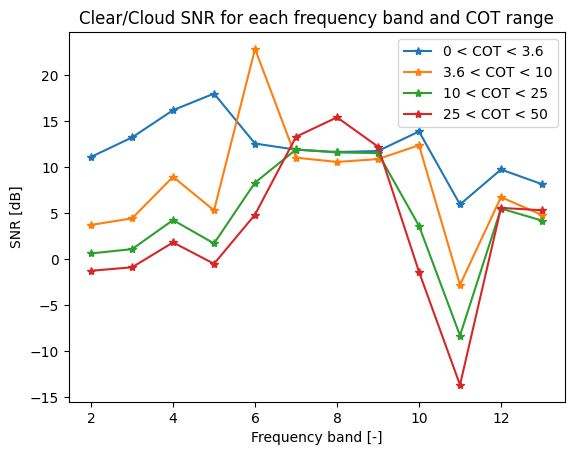

In [78]:
#Find SNR for each band and COT range
SNR1 = 10*np.log10(np.abs(np.mean(clear1,axis=0)/np.mean(COT1diff,axis=0)))
SNR2 = 10*np.log10(np.abs(np.mean(clear2,axis=0)/np.mean(COT2diff,axis=0)))
SNR3 = 10*np.log10(np.abs(np.mean(clear3,axis=0)/np.mean(COT3diff,axis=0)))
SNR4 = 10*np.log10(np.abs(np.mean(clear4,axis=0)/np.mean(COT4diff,axis=0)))

x=np.arange(2,14)
#Plot
plt.figure()
plt.plot(x,SNR1,'*-')
plt.plot(x,SNR2,'*-')
plt.plot(x,SNR3,'*-')
plt.plot(x,SNR4,'*-')
plt.title('Clear/Cloud SNR for each frequency band and COT range')
plt.xlabel('Frequency band [-]')
plt.ylabel('SNR [dB]')
plt.legend(['0 < COT < 3.6','3.6 < COT < 10','10 < COT < 25','25 < COT < 50'])
plt.show()

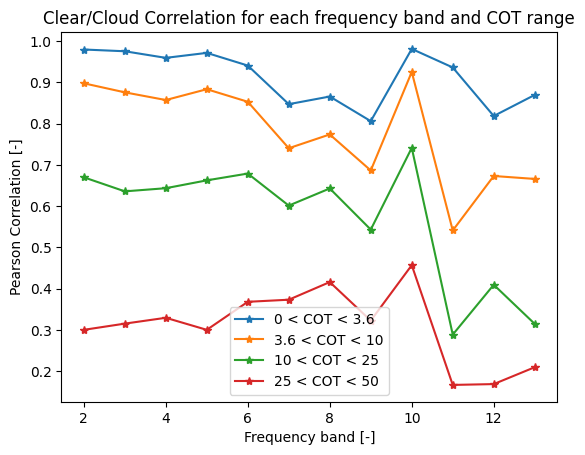

In [88]:
#Find Covariance between cloudy and clear for each band and COT range
Corrs1 = np.zeros(12)
for j in range(12):
    Corrs1[j] = pearsonr(clear1[:,j],cloud1[:,j])[0]

Corrs2 = np.zeros(12)
for j in range(12):
    Corrs2[j] = pearsonr(clear2[:,j],cloud2[:,j])[0]

Corrs3 = np.zeros(12)
for j in range(12):
    Corrs3[j] = pearsonr(clear3[:,j],cloud3[:,j])[0]

Corrs4 = np.zeros(12)
for j in range(12):
    Corrs4[j] = pearsonr(clear4[:,j],cloud4[:,j])[0]

#Plot
plt.figure()
plt.plot(x,Corrs1,'*-')
plt.plot(x,Corrs2,'*-')
plt.plot(x,Corrs3,'*-')
plt.plot(x,Corrs4,'*-')
plt.title('Clear/Cloud Correlation for each frequency band and COT range')
plt.xlabel('Frequency band [-]')
plt.ylabel('Pearson Correlation [-]')
plt.legend(['0 < COT < 3.6','3.6 < COT < 10','10 < COT < 25','25 < COT < 50'])
plt.show()
